In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [120]:
rookies_data = pd.read_csv("../Data/rookies_swarm_first/rookies_data.csv")
splits = rookies_data.Player.str.split('\\')
names = [name for name, url in splits.tolist()]
rookies_data.Player = names

In [121]:
#rookies_data[['TRB', 'AST', 'PTS']]
interesting_columns = ['Player', 'PTS', 'TRB', 'AST', 'GmSc']
rookies_data = rookies_data[interesting_columns]

In [122]:
interesting_players = rookies_data.loc[rookies_data.GmSc >= 10.00].Player.tolist()

In [123]:
all_names = rookies_data.Player.tolist()
cluster_list = [name if name in interesting_players else 'Other' for name in all_names]

In [124]:
rookies_data.Player = cluster_list

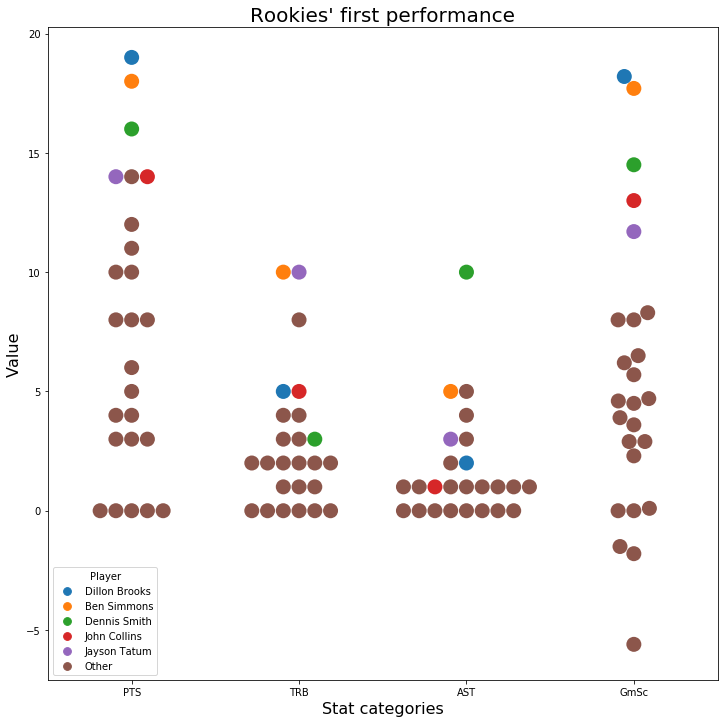

In [128]:
plt.figure(figsize=(12, 12))
melted_data = pd.melt(rookies_data, id_vars='Player', value_vars=['PTS', 'TRB', 'AST', 'GmSc'], var_name='Stat categories')

ax = sns.swarmplot(x='Stat categories', y='value', data=melted_data, hue='Player', size=15)
ax.set_title('Rookies\' first performance', size=20)
ax.set_ylabel('Value', size=16)
ax.set_xlabel('Stat categories', size=16)
plt.savefig('../../for_reddit/rookies_first_game/image.png')